In [1]:
# install
!pip install --quiet astropy

In [2]:
# import 
import astropy.coordinates as coord
import astropy.units as u
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# read in data
m4_dat = pd.read_fwf('NGC6121-1.dat', names=['source_id', 'ra', 'dec', 'phot_g_mean_mag'])
gia = pd.read_csv('m4_gaia_source.csv')

!wget -nc https://scicomp.gw.observer/view/data/m4_isochrones.iso.cmd
!wget -nc https://github.com/jieunchoi/MIST_codes/raw/master/scripts/read_mist_models.py

File ‘m4_isochrones.iso.cmd’ already there; not retrieving.

File ‘read_mist_models.py’ already there; not retrieving.



In [4]:
# read in data
import read_mist_models

mist = 'm4_isochrones.iso.cmd'
iso = read_mist_models.ISOCMD(mist)

Reading in: m4_isochrones.iso.cmd


In [5]:
#iso.isocmds[0].dtype.names

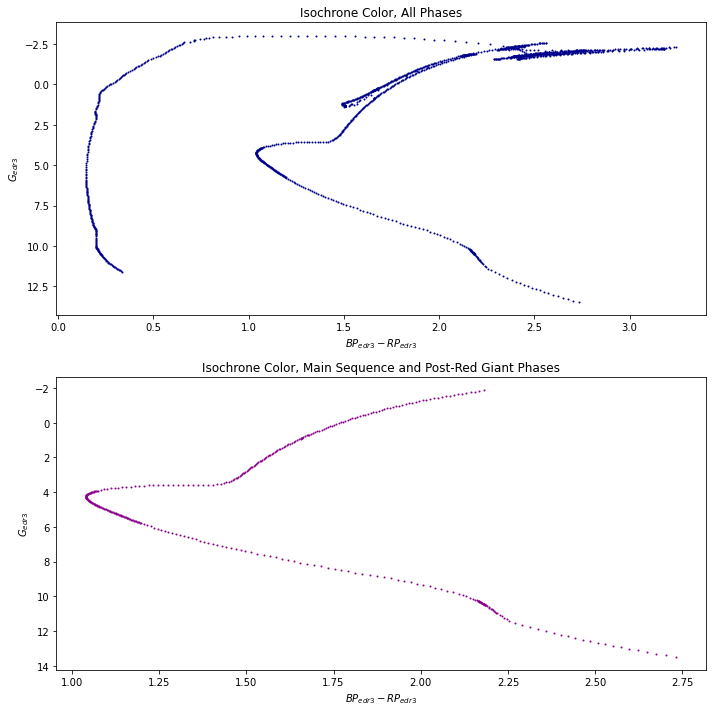

In [6]:
# look at the first isochrone
# assign variables to desired columns
G_edr3 = iso.isocmds[0]['Gaia_G_EDR3']
BP_edr3 = iso.isocmds[0]['Gaia_BP_EDR3']
RP_edr3 = iso.isocmds[0]['Gaia_RP_EDR3']

# select desired evolutionary phases
phase = (iso.isocmds[0]['phase'] >= 0) & (iso.isocmds[0]['phase'] < 3)

# plot 
fig, ax = plt.subplots(2, 1, figsize = (10, 10))

ax[0].scatter(BP_edr3 - RP_edr3, G_edr3, color = 'darkblue', s = 1.)
ax[0].set_title('Isochrone Color, All Phases')
ax[0].set_xlabel('$BP_{edr3} - RP_{edr3}$')
ax[0].set_ylabel('$G_{edr3}$')
ax[0].invert_yaxis()

ax[1].scatter(BP_edr3[phase] - RP_edr3[phase], G_edr3[phase], color = 'darkmagenta', s = 1.)
ax[1].set_title('Isochrone Color, Main Sequence and Post-Red Giant Phases')
ax[1].set_xlabel('$BP_{edr3} - RP_{edr3}$')
ax[1].set_ylabel('$G_{edr3}$')
ax[1].invert_yaxis();

plt.tight_layout()

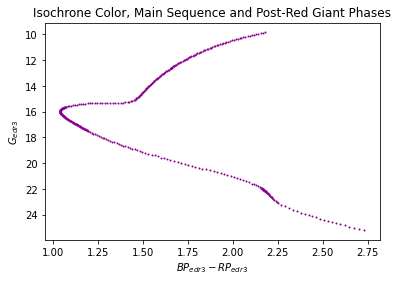

In [7]:
# create a distance modulus
distance = 2.2 * u.kpc
distmod = coord.Distance(distance).distmod.value

# plot the selected phases with a distance adjustment
plt.scatter(BP_edr3[phase] - RP_edr3[phase], G_edr3[phase] + distmod, color = 'darkmagenta', s = 1.)
plt.title('Isochrone Color, Main Sequence and Post-Red Giant Phases')
plt.xlabel('$BP_{edr3} - RP_{edr3}$')
plt.ylabel('$G_{edr3}$')
plt.gca().invert_yaxis();

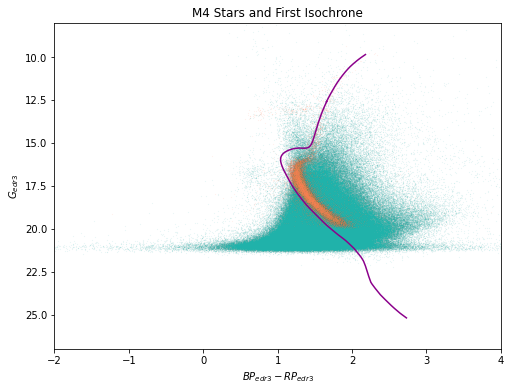

In [41]:
# crossmatch gia observations and m4 data and plot with isochrone
#make a selector for m4 stars
m4 = gia['source_id'].isin(m4_dat.source_id)

#plot
plt.rcParams["figure.figsize"] = (8,6)

plt.scatter(gia['phot_bp_mean_mag'][~m4] - gia['phot_rp_mean_mag'][~m4], gia['phot_g_mean_mag'][~m4], 
            s = 0.001, color = 'lightseagreen')
plt.scatter(gia['phot_bp_mean_mag'][m4] - gia['phot_rp_mean_mag'][m4], gia['phot_g_mean_mag'][m4], 
            s = 0.001, color = 'coral')
plt.plot((BP_edr3[phase] - RP_edr3[phase]), G_edr3[phase] + distmod, color = 'darkmagenta')
plt.xlabel('$BP_{edr3} - RP_{edr3}$')
plt.ylabel('$G_{edr3}$')
plt.title('M4 Stars and First Isochrone')
plt.xlim(-2, 4)
plt.ylim(8, 27)
plt.gca().invert_yaxis();

If the m4 stars are considered to be the main sequence, then the first isochrone does not align with the main sequence, but its shape is closely correlated to the m4 stars. This isochrone lays below the bottom of the main sequence with the "bottom" of the sequence referring to the faintest stars in the cluster. Following the bottom of the isochrone, there is a trail of m4 stars (orange points) that can be traced as they move away from the main sequence.

/tmp/ipykernel_12623/3845324989.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  isocmds = np.array(iso.isocmds)


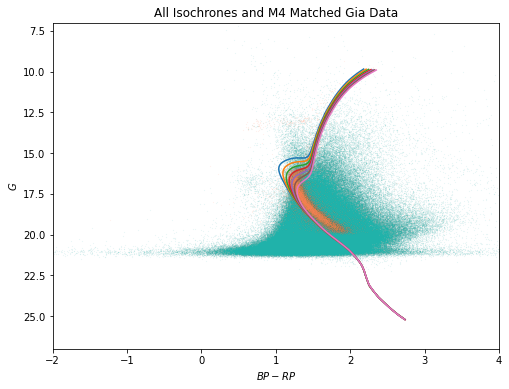

In [13]:
# import
import numpy as np

# turn the list into an array
isocmds = np.array(iso.isocmds)
#isocmds.shape

# loop through each isochrome and save G, BP, and RP
g = []
bp = []
rp = []
p = []
for isochrone in isocmds:    
    G_edr3 = np.array(isochrone['Gaia_G_EDR3'])  
    BP_edr3 = np.array(isochrone['Gaia_BP_EDR3'])
    RP_edr3 = np.array(isochrone['Gaia_RP_EDR3'])
    phase = (isochrone['phase'] >= 0) & (isochrone['phase'] < 3)
                  
    g.append(G_edr3)  
    bp.append(BP_edr3)
    rp.append(RP_edr3)
    p.append(phase)

# loop through each BP and RP value to create a color variable 
b = []
for x, y in zip(bp, rp):
    bp_rp = np.array(x - y)
    
    b.append(bp_rp)
    
# create a distance modulus
distance = 2.2 * u.kpc
distmod = coord.Distance(distance).distmod.value

#make a selector for m4 stars
m4 = gia['source_id'].isin(m4_dat.source_id)

# plot the isochrone and gia data
plt.rcParams["figure.figsize"] = (8,6)

plt.scatter(gia['phot_bp_mean_mag'][~m4] - gia['phot_rp_mean_mag'][~m4], gia['phot_g_mean_mag'][~m4], 
            s = 0.001, color = 'lightseagreen')
plt.scatter(gia['phot_bp_mean_mag'][m4] - gia['phot_rp_mean_mag'][m4], gia['phot_g_mean_mag'][m4], 
            s = 0.001, color = 'coral')

for X, Y, P in zip(b, g, p):
    #print(Y), #iso.isocmds[6]['Gaia_G_EDR3']
   # print(X),# iso.isocmds[0]['Gaia_BP_EDR3'] - iso.isocmds[0]['Gaia_RP_EDR3']
    plt.plot(X[P], Y[P] + distmod)
    
plt.xlim(-2, 4)
plt.ylim(7, 27)
plt.xlabel('$BP-RP$')
plt.ylabel('$G$')
plt.title('All Isochrones and M4 Matched Gia Data')
plt.gca().invert_yaxis();

The main sequence turn off point for all of the isochrones at the bottom of the cluster or below the bottom the cluster where the faintest stars reside, and all of the isochrones follow the trail of m4 stars (orange points) off of the main sequence. Since stars begin migrating from the top of a cluster the fact that the faint stars at the bottom of the cluster are migrating implies that this is a very old cluster. If the youngest globular clusters that have stars migrating from the top are estimated to be 11 billion years old, this cluster is older than 11 billion years old because the stars from the bottom of the cluster have begun migrating.